<a href="https://colab.research.google.com/github/RAVIKUMARBALIJA/tensorflow2_tutorials/blob/main/VGG16_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [35]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense,Conv2D,Input,InputLayer,Flatten,Dropout,Activation
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam,RMSprop

In [36]:
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import zipfile
from skimage import transform

In [37]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-07-03 06:03:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 64.233.191.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  61.8MB/s    in 3.1s    

2021-07-03 06:03:21 (61.8 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-07-03 06:03:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving t

In [39]:
local_zip = '/tmp/rps.zip'
zipref=zipfile.ZipFile(local_zip,'r')
zipref.extractall()
zipref.close()

In [40]:
local_zip='/tmp/rps-test-set.zip'
zipref=zipfile.ZipFile(local_zip,'r')
zipref.extractall()
zipref.close()

In [41]:

rock_dir='/content/rps/rock/'
paper_dir='/content/rps/paper/'
scissors='/content/rps/rock'

In [42]:
rockfiles=os.listdir(rock_dir)
paperfiles=os.listdir(paper_dir)
scissorsfiles=os.listdir(scissors)

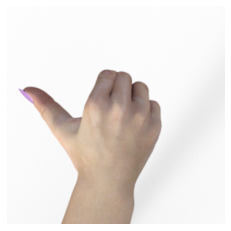

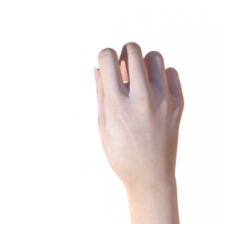

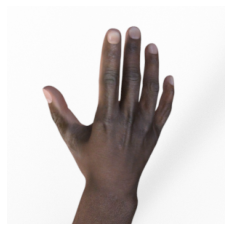

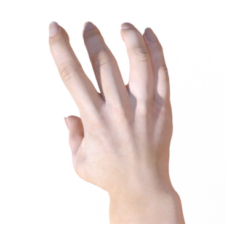

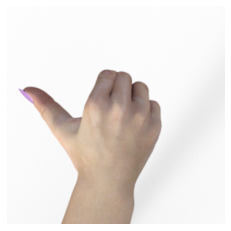

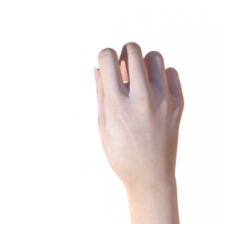

In [43]:
for f in rockfiles[1:3]:
  plt.imshow(mpimg.imread(os.path.join(rock_dir,f)))
  plt.axis('off')
  plt.show()
for f in paperfiles[1:3]:
  plt.imshow(mpimg.imread(os.path.join(paper_dir,f)))
  plt.axis('off')
  plt.show()
for f in scissorsfiles[1:3]:
  plt.imshow(mpimg.imread(os.path.join(scissors,f)))
  plt.axis('off')
  plt.show()

In [44]:
rockfiles[1]

'rock06ck02-020.png'

In [45]:
img=image.load_img(os.path.join(rock_dir,rockfiles[1]),color_mode='rgb')
img_array=image.img_to_array(img)

In [46]:
img_array.shape[0]

300

In [47]:
array_size=500
for f in os.listdir(rock_dir):
  img=image.load_img(os.path.join(rock_dir,f),color_mode='rgb')
  img_array=image.img_to_array(img)
  if (img_array.shape[0]<array_size):
    array_size=img_array.shape[0]

In [48]:
array_size

300

In [49]:
input_layer=Input(shape=(224,224,3))
vgg_model=VGG16(include_top=False,input_tensor=input_layer,weights='imagenet')

In [50]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [51]:
vgg_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [52]:
layer_dict=dict([(layer.name,layer) for layer in vgg_model.layers])

In [53]:
layer_dict

{'block1_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7efe9f8b36d0>,
 'block1_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7efe99352e90>,
 'block1_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7efe9f8a6750>,
 'block2_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7efe9a755c50>,
 'block2_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7efe99328450>,
 'block2_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7efe992de610>,
 'block3_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7efe992e3490>,
 'block3_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7efe992de150>,
 'block3_conv3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7efe992e6d10>,
 'block3_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7efe995cc5d0>,
 'block4_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7efe992ee090>,
 'block4_conv

In [55]:
len(layer_dict)

19

In [59]:
x=layer_dict['block5_pool'].output
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(256,activation='relu')(x)
x=Dense(3,activation='softmax')(x)

In [60]:
model=Model(input_layer,x)

In [61]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [62]:
for layer in model.layers[:19]:
    layer.trainable = False

In [63]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [64]:
"""train_datagen=ImageDataGenerator(rotation_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 fill_mode='nearest',
                                 horizontal_flip=True,
                                 rescale=1.0/255,
                                 validation_split=0.3)
"""
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
#test_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [70]:
train_generator=train_datagen.flow_from_directory('/content/rps',
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  shuffle=True)
test_generator=test_datagen.flow_from_directory('/content/rps-test-set',
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                target_size=(224,224))

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [71]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
tb_cb=tf.keras.callbacks.TensorBoard(log_dir='/content/logs')
mc_cb=tf.keras.callbacks.ModelCheckpoint('/content/model/',save_best_only=True,)
es_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
callbacks=[tb_cb,mc_cb,es_cb]

In [73]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)

78


In [74]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,epochs=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


78/78 [==============================] - 1243s 16s/step - loss: 0.9084 - accuracy: 0.9727


In [75]:
model.save('customized_model.h5')

In [76]:
reloaded_model=tf.keras.models.load_model('customized_model.h5')

In [77]:
reloaded_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [81]:
img_dir='/content/rps'

In [80]:
def get_image_matrix(img_name_list,folder):
    ret_arr = np.zeros((1,224,224,3))
    for img_name in img_name_list:
        img = image.load_img(img_dir + "/"+folder+"/"+ img_name, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        ret_arr = np.append(ret_arr, x, axis=0)
    ret_arr = np.delete(ret_arr, 0, axis=0)
    return ret_arr 

In [83]:
image_matrix=get_image_matrix(['paper01-000.png','paper01-002.png'],'paper')

In [84]:
image_matrix.shape

(2, 224, 224, 3)

In [85]:
image_pp=preprocess_input(image_matrix)

In [87]:
predictions=reloaded_model.predict(image_pp)

In [89]:
np.argmax(predictions,axis=1)

array([0, 0])

In [90]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [107]:
new_image=image.load_img('/content/rps/rock/rock01-000.png',target_size=(224,224))
img_arr=image.img_to_array(new_image)
print(img_arr)
img_pp=preprocess_input(img_arr)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [254. 254. 254.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [255. 255. 255.]
  [254. 254. 254.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]]


In [108]:
img_pp.shape

(224, 224, 3)